# Homework 1, Question 1: Classification of MNIST Database

Importing all the required libraries

In [51]:
from mnist import MNIST
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy.spatial.distance import directed_hausdorff
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric
from sklearn.metrics import classification_report
import random
import pandas as pd

### Ques (a)
Download the data and import it into the project

mndata = MNIST('samples')

images, labels = mndata.load_training()
imagesTest, labelsTest = mndata.load_testing()

### Ques (b) i. 
Visualization of data from MNIST database <br>
Plot the first 25 images in the training set. Do all images of 9 look alike?

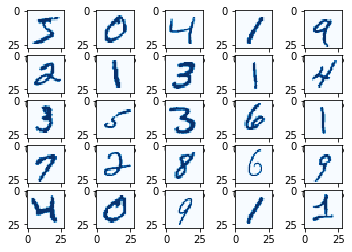

In [10]:
fig, ax = plt.subplots(nrows=5, ncols=5, squeeze=True)
j = 0
for row in ax:
    i = 0
    for col in row:
        image = np.array(images[j*5 + i], dtype='uint8')
        image = image.reshape(28, 28)
        col.imshow(image, cmap='Blues')
        i += 1
    j += 1

plt.show()

Let us take a close look at all the images of 9<br>
The indexes are 4, 19, 22.

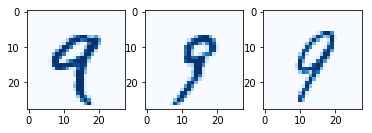

In [16]:
indexes = [4,19,22]
fig, ax = plt.subplots(nrows=1, ncols=3, squeeze=True)
i = 0
for row in ax:
    image = np.array(images[indexes[i]], dtype='uint8')
    image = image.reshape(28, 28)
    row.imshow(image, cmap='Blues')
    i += 1

plt.show()

We can see that there is a significant difference between images of 9. Some are written in cursive while as one is straight.

### Ques (b) ii. 
Plot 15 randomly selected images from the test set without looking at the corresponding labels and try to guess them.

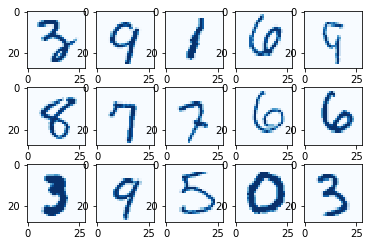

In [30]:
randset = [random.randint(1,101) for i in range(15)]
fig, ax = plt.subplots(nrows=3, ncols=5, squeeze=True)
j = 0
for row in ax:
    i = 0
    for col in row:
        image = np.array(imagesTest[randset[j*5 + i]], dtype='uint8')
        image = image.reshape(28, 28)
        col.imshow(image, cmap='Blues')
        i += 1
    j += 1

plt.show()


I think the numbers are 3, 9, 1, 6, 3, 0, 4, 2, 2, 7, 1, 7, 5, 0, 5<br>
Now, let's print their labels. <br>

In [31]:
for i in randset:
    print(labelsTest[i], end=', ')

3, 9, 1, 6, 9, 8, 7, 7, 6, 6, 3, 9, 5, 0, 3, 

***At the time of the creation of this notebook, the randomly chosen numbers were these: ***
<img src="samples/image001.png"><br>
***And, I guessed the correct numbers. At the time of evaluation by the Graders/TA, another random list of numbers will be generated and the output will not match my guess.***

### Ques (b) iii. 
Let us explore the data even more. Find 2 different digits that look alike. 

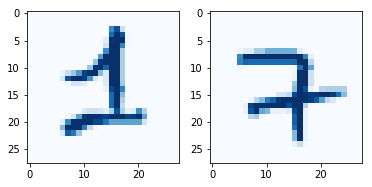

In [33]:
indexes = [24, 38]
fig, ax = plt.subplots(nrows=1, ncols=2, squeeze=True)
i = 0
for row in ax:
    image = np.array(images[indexes[i]], dtype='uint8')
    image = image.reshape(28, 28)
    row.imshow(image, cmap='Blues')
    i += 1

plt.show()

One image is of 1 and the other is of 7. They look quite similar in the examples above. <br><br>
Now, Find 3 samples of the same digit that do not look alike at all.

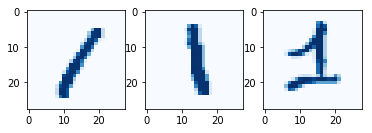

In [34]:
indexes = [3, 6, 24]
fig, ax = plt.subplots(nrows=1, ncols=3, squeeze=True)
i = 0
for row in ax:
    image = np.array(images[indexes[i]], dtype='uint8')
    image = image.reshape(28, 28)
    row.imshow(image, cmap='Blues')
    i += 1

plt.show()

These images are of 1 and one example is in cursive, other is in serif. This makes all the three of them to stand apart. More such examples can be found in the dataset. 

### Ques (c)
Classification using KNN on MNIST database
Let us first create our model

In [37]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(np.array(images[:60000]), np.array(labels[:60000]))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Ques (c) i.
What is the nearest neighbor of a train sample, assuming it is included in the training set?
For this, let us take a random sample from train and try to find it's one nearest neighbour.

Random Sample: 681


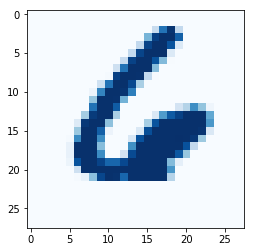

Nearest neighbor: 681


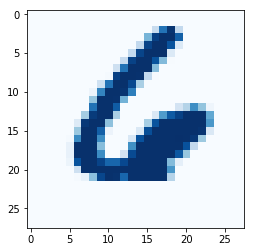

In [46]:
randomSample = random.randint(0,60000)
neighDist, neighIndex = model.kneighbors(np.array(images[randomSample:1+randomSample]), n_neighbors=1)

print("Random Sample: " + str(randomSample))
plt.imshow(np.array(images[randomSample]).reshape(28, 28), cmap='Blues')
plt.show()

print("Nearest neighbor: " + str(neighIndex[0][0]))
plt.imshow(np.array(images[neighIndex[0][0]]).reshape(28, 28), cmap='Blues')
plt.show()



### Ques (c) ii.
Write code for k-nearest neighbors with Euclidean metric (or use a software package). Find 5 nearest neighbors for the first 10 test samples and plot them together.
First image in every row is the test image and the following 5 pictures represent its 5 nearest neighbors.

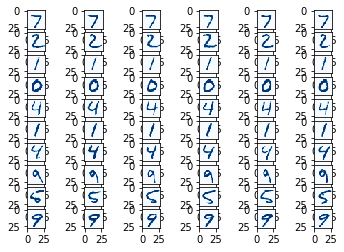

In [49]:
neighDist, neighIndex = model.kneighbors(np.array(imagesTest[0:10]), n_neighbors=5)

fig, ax = plt.subplots(nrows=10, ncols=6, squeeze=True)

j = 0
for row in ax:
    i = 0
    for col in row:
        if i == 0:
            image = np.array(imagesTest[j], dtype='uint8')
        else:
            image = np.array(images[neighIndex[j][i-1]], dtype='uint8')
        image = image.reshape(28, 28)
        col.imshow(image, cmap='Blues')
        i += 1
    j += 1

plt.show()

### Ques (c) iii.
Test all 10000 digits in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of 1/k for k ∈ {1,201,401,...,10001}. You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values?

In [ ]:
start = datetime.datetime.now()
for k in range(1, 10001, 200):
    print("----------------------------------")
    print("Fitting models for k = " + str(k))
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(np.array(images[:60000]), np.array(labels[:60000]))
    print("Fitted. Now will test.")
    predictions = model.predict(np.array(imagesTest[:10000]))
    print("EVALUATION ON TESTING DATA")
    print(classification_report(np.array(labelsTest[:10000]), predictions))
    end = datetime.datetime.now()
    print(end - start)
    start = end

Fitting models for k = 1
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       0.97      0.99      0.98      1135
          2       0.98      0.96      0.97      1032
          3       0.96      0.96      0.96      1010
          4       0.97      0.96      0.97       982
          5       0.95      0.96      0.96       892
          6       0.98      0.99      0.98       958
          7       0.96      0.96      0.96      1028
          8       0.98      0.94      0.96       974
          9       0.96      0.96      0.96      1009
avg / total       0.97      0.97      0.97     10000

0:15:38.201715

Fitting models for k = 201
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.94      0.99      0.96       980
          1       0.83      1.00      0.91      1135
          2       0.99      0.85      0.92      1032
          3       0.94      0.94      0.94      1010
          4       0.96      0.90      0.93       982
          5       0.95      0.91      0.93       892
          6       0.95      0.97      0.96       958
          7       0.93      0.91      0.92      1028
          8       0.98      0.86      0.92       974
          9       0.89      0.94      0.91      1009

avg / total       0.93      0.93      0.93     10000

0:15:49.773011

Fitting models for k = 401
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       980
          1       0.79      1.00      0.88      1135
          2       0.99      0.81      0.89      1032
          3       0.92      0.93      0.92      1010
          4       0.95      0.88      0.91       982
          5       0.94      0.88      0.91       892
          6       0.94      0.97      0.95       958
          7       0.92      0.90      0.91      1028
          8       0.96      0.83      0.89       974
          9       0.85      0.93      0.89      1009

avg / total       0.92      0.91      0.91     10000

0:15:53.369618

Fitting models for k = 601
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.93      0.98      0.95       980
          1       0.75      1.00      0.86      1135
          2       0.99      0.77      0.86      1032
          3       0.91      0.92      0.92      1010
          4       0.95      0.86      0.90       982
          5       0.94      0.86      0.90       892
          6       0.93      0.96      0.95       958
          7       0.92      0.89      0.90      1028
          8       0.96      0.81      0.88       974
          9       0.84      0.92      0.88      1009

avg / total       0.91      0.90      0.90     10000

0:15:55.588351

Fitting models for k = 801
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.97      0.95       980
          1       0.72      1.00      0.83      1135
          2       0.98      0.73      0.84      1032
          3       0.90      0.91      0.90      1010
          4       0.94      0.85      0.89       982
          5       0.94      0.84      0.89       892
          6       0.92      0.96      0.94       958
          7       0.91      0.88      0.90      1028
          8       0.95      0.78      0.86       974
          9       0.82      0.92      0.87      1009

avg / total       0.90      0.89      0.89     10000

0:15:59.014669

Fitting models for k = 1001
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.97      0.94       980
          1       0.69      1.00      0.81      1135
          2       0.98      0.70      0.82      1032
          3       0.88      0.89      0.89      1010
          4       0.94      0.84      0.88       982
          5       0.94      0.81      0.87       892
          6       0.92      0.95      0.93       958
          7       0.91      0.87      0.89      1028
          8       0.94      0.77      0.85       974
          9       0.81      0.91      0.86      1009

avg / total       0.89      0.87      0.87     10000

0:15:54.162315

Fitting models for k = 1201
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.97      0.94       980
          1       0.66      1.00      0.80      1135
          2       0.98      0.68      0.80      1032
          3       0.88      0.89      0.88      1010
          4       0.93      0.82      0.88       982
          5       0.95      0.78      0.85       892
          6       0.91      0.95      0.93       958
          7       0.89      0.87      0.88      1028
          8       0.94      0.75      0.83       974
          9       0.80      0.91      0.85      1009

avg / total       0.88      0.86      0.86     10000

0:16:00.721870

Fitting models for k = 1401
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.96      0.94       980
          1       0.65      1.00      0.78      1135
          2       0.98      0.66      0.79      1032
          3       0.87      0.88      0.87      1010
          4       0.93      0.81      0.86       982
          5       0.95      0.76      0.84       892
          6       0.91      0.94      0.92       958
          7       0.89      0.86      0.88      1028
          8       0.94      0.74      0.83       974
          9       0.79      0.91      0.84      1009

avg / total       0.88      0.85      0.85     10000

0:11:44.430995

Fitting models for k = 1601
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.96      0.94       980
          1       0.62      1.00      0.77      1135
          2       0.98      0.64      0.78      1032
          3       0.86      0.87      0.86      1010
          4       0.92      0.80      0.85       982
          5       0.95      0.74      0.83       892
          6       0.90      0.93      0.92       958
          7       0.88      0.86      0.87      1028
          8       0.93      0.73      0.82       974
          9       0.78      0.90      0.84      1009

avg / total       0.87      0.84      0.85     10000

0:11:39.384208

Fitting models for k = 1801
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.91      0.96      0.93       980
          1       0.61      1.00      0.76      1135
          2       0.98      0.63      0.77      1032
          3       0.85      0.86      0.85      1010
          4       0.92      0.78      0.84       982
          5       0.94      0.71      0.81       892
          6       0.90      0.92      0.91       958
          7       0.88      0.86      0.87      1028
          8       0.93      0.72      0.81       974
          9       0.77      0.90      0.83      1009

avg / total       0.86      0.84      0.84     10000

0:11:41.204173

Fitting models for k = 2001
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.95      0.93       980
          1       0.60      1.00      0.75      1135
          2       0.98      0.61      0.75      1032
          3       0.83      0.85      0.84      1010
          4       0.91      0.77      0.84       982
          5       0.94      0.68      0.79       892
          6       0.90      0.92      0.91       958
          7       0.88      0.86      0.87      1028
          8       0.93      0.71      0.80       974
          9       0.76      0.89      0.82      1009

avg / total       0.86      0.83      0.83     10000

0:11:39.535579

Fitting models for k = 2201
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.95      0.93       980
          1       0.58      1.00      0.74      1135
          2       0.98      0.60      0.75      1032
          3       0.82      0.84      0.83      1010
          4       0.91      0.76      0.83       982
          5       0.94      0.66      0.78       892
          6       0.89      0.91      0.90       958
          7       0.88      0.85      0.86      1028
          8       0.92      0.71      0.80       974
          9       0.75      0.89      0.81      1009

avg / total       0.85      0.82      0.82     10000

0:11:42.883619

Fitting models for k = 2401
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.91      0.94      0.93       980
          1       0.57      1.00      0.73      1135
          2       0.98      0.59      0.74      1032
          3       0.82      0.84      0.83      1010
          4       0.91      0.76      0.83       982
          5       0.95      0.64      0.76       892
          6       0.89      0.91      0.90       958
          7       0.88      0.85      0.86      1028
          8       0.92      0.70      0.79       974
          9       0.74      0.88      0.80      1009

avg / total       0.85      0.81      0.82     10000

0:11:43.802575

Fitting models for k = 2601
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.91      0.94      0.92       980
          1       0.56      1.00      0.72      1135
          2       0.98      0.58      0.73      1032
          3       0.81      0.83      0.82      1010
          4       0.91      0.75      0.82       982
          5       0.94      0.62      0.75       892
          6       0.89      0.89      0.89       958
          7       0.87      0.85      0.86      1028
          8       0.92      0.69      0.79       974
          9       0.73      0.88      0.80      1009

avg / total       0.85      0.81      0.81     10000

0:11:46.299289

Fitting models for k = 2801
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.91      0.93      0.92       980
          1       0.55      1.00      0.71      1135
          2       0.98      0.57      0.72      1032
          3       0.80      0.82      0.81      1010
          4       0.90      0.74      0.81       982
          5       0.94      0.60      0.73       892
          6       0.89      0.89      0.89       958
          7       0.87      0.84      0.85      1028
          8       0.92      0.68      0.78       974
          9       0.72      0.87      0.79      1009

avg / total       0.84      0.80      0.80     10000

0:11:44.983996

Fitting models for k = 3001
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.91      0.93      0.92       980
          1       0.54      1.00      0.70      1135
          2       0.97      0.56      0.71      1032
          3       0.80      0.82      0.81      1010
          4       0.90      0.74      0.81       982
          5       0.94      0.59      0.72       892
          6       0.87      0.89      0.88       958
          7       0.86      0.84      0.85      1028
          8       0.91      0.67      0.77       974
          9       0.72      0.87      0.79      1009

avg / total       0.84      0.79      0.80     10000

0:11:24.720324

Fitting models for k = 3201
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.91      0.92      0.92       980
          1       0.53      1.00      0.70      1135
          2       0.97      0.56      0.71      1032
          3       0.79      0.81      0.80      1010
          4       0.90      0.73      0.81       982
          5       0.94      0.57      0.71       892
          6       0.87      0.88      0.88       958
          7       0.86      0.84      0.85      1028
          8       0.91      0.66      0.77       974
          9       0.71      0.87      0.78      1009

avg / total       0.83      0.79      0.79     10000

0:11:10.812897

Fitting models for k = 3401
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.91      0.92      0.92       980
          1       0.53      1.00      0.69      1135
          2       0.97      0.55      0.70      1032
          3       0.78      0.80      0.79      1010
          4       0.89      0.73      0.80       982
          5       0.94      0.56      0.70       892
          6       0.87      0.88      0.87       958
          7       0.86      0.84      0.85      1028
          8       0.91      0.66      0.76       974
          9       0.71      0.87      0.78      1009

avg / total       0.83      0.78      0.79     10000

0:23:32.144634

Fitting models for k = 3601
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.91      0.92      0.92       980
          1       0.52      1.00      0.68      1135
          2       0.97      0.54      0.70      1032
          3       0.78      0.79      0.78      1010
          4       0.89      0.72      0.80       982
          5       0.93      0.55      0.69       892
          6       0.87      0.87      0.87       958
          7       0.86      0.84      0.85      1028
          8       0.91      0.65      0.76       974
          9       0.70      0.86      0.78      1009

avg / total       0.83      0.78      0.78     10000

0:11:11.053720

Fitting models for k = 3801
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.92      0.92       980
          1       0.51      1.00      0.67      1135
          2       0.98      0.54      0.69      1032
          3       0.77      0.78      0.78      1010
          4       0.89      0.72      0.79       982
          5       0.94      0.53      0.68       892
          6       0.86      0.87      0.87       958
          7       0.86      0.84      0.85      1028
          8       0.90      0.64      0.75       974
          9       0.70      0.86      0.77      1009

avg / total       0.83      0.77      0.78     10000

0:11:11.993877

Fitting models for k = 4001
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.92      0.92       980
          1       0.50      1.00      0.66      1135
          2       0.97      0.53      0.68      1032
          3       0.76      0.77      0.77      1010
          4       0.88      0.71      0.79       982
          5       0.94      0.52      0.67       892
          6       0.86      0.86      0.86       958
          7       0.86      0.83      0.84      1028
          8       0.90      0.63      0.74       974
          9       0.70      0.86      0.77      1009

avg / total       0.82      0.77      0.77     10000

0:11:10.823193

Fitting models for k = 4201
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.91      0.92       980
          1       0.49      1.00      0.66      1135
          2       0.98      0.52      0.68      1032
          3       0.75      0.77      0.76      1010
          4       0.88      0.71      0.78       982
          5       0.94      0.51      0.66       892
          6       0.86      0.86      0.86       958
          7       0.85      0.83      0.84      1028
          8       0.90      0.62      0.74       974
          9       0.69      0.85      0.76      1009

avg / total       0.82      0.76      0.76     10000

0:11:14.236656

Fitting models for k = 4401
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.91      0.92       980
          1       0.49      1.00      0.65      1135
          2       0.98      0.51      0.67      1032
          3       0.75      0.76      0.75      1010
          4       0.88      0.70      0.78       982
          5       0.94      0.49      0.65       892
          6       0.86      0.86      0.86       958
          7       0.85      0.83      0.84      1028
          8       0.90      0.62      0.73       974
          9       0.69      0.85      0.76      1009

avg / total       0.82      0.76      0.76     10000

0:11:14.998171

Fitting models for k = 4601
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.91      0.91       980
          1       0.48      1.00      0.65      1135
          2       0.97      0.50      0.66      1032
          3       0.74      0.75      0.75      1010
          4       0.88      0.70      0.78       982
          5       0.94      0.47      0.63       892
          6       0.86      0.86      0.86       958
          7       0.85      0.82      0.83      1028
          8       0.90      0.61      0.73       974
          9       0.68      0.85      0.76      1009

avg / total       0.82      0.75      0.75     10000

0:11:16.025982

Fitting models for k = 4801
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.91      0.91       980
          1       0.47      1.00      0.64      1135
          2       0.98      0.50      0.66      1032
          3       0.74      0.74      0.74      1010
          4       0.87      0.69      0.77       982
          5       0.94      0.47      0.62       892
          6       0.85      0.85      0.85       958
          7       0.85      0.82      0.83      1028
          8       0.89      0.61      0.72       974
          9       0.68      0.85      0.76      1009

avg / total       0.81      0.75      0.75     10000

0:11:17.244723

Fitting models for k = 5001
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.90      0.91       980
          1       0.46      1.00      0.63      1135
          2       0.97      0.49      0.65      1032
          3       0.74      0.73      0.74      1010
          4       0.87      0.69      0.77       982
          5       0.94      0.45      0.61       892
          6       0.85      0.85      0.85       958
          7       0.85      0.81      0.83      1028
          8       0.89      0.60      0.72       974
          9       0.68      0.84      0.75      1009

avg / total       0.81      0.74      0.74     10000

0:11:17.398763

Fitting models for k = 5201
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.90      0.91       980
          1       0.46      1.00      0.63      1135
          2       0.97      0.48      0.64      1032
          3       0.74      0.73      0.73      1010
          4       0.87      0.68      0.76       982
          5       0.94      0.45      0.61       892
          6       0.85      0.84      0.85       958
          7       0.85      0.81      0.83      1028
          8       0.89      0.59      0.71       974
          9       0.67      0.84      0.75      1009

avg / total       0.81      0.74      0.74     10000

0:11:14.366243

Fitting models for k = 5401
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.90      0.91       980
          1       0.45      1.00      0.62      1135
          2       0.98      0.47      0.64      1032
          3       0.73      0.73      0.73      1010
          4       0.86      0.68      0.76       982
          5       0.94      0.43      0.59       892
          6       0.85      0.84      0.84       958
          7       0.84      0.81      0.83      1028
          8       0.89      0.59      0.71       974
          9       0.67      0.84      0.74      1009

avg / total       0.81      0.73      0.74     10000

0:11:20.205129

Fitting models for k = 5601
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.89      0.90       980
          1       0.45      1.00      0.62      1135
          2       0.97      0.47      0.63      1032
          3       0.73      0.71      0.72      1010
          4       0.86      0.67      0.75       982
          5       0.94      0.42      0.58       892
          6       0.84      0.84      0.84       958
          7       0.84      0.81      0.82      1028
          8       0.89      0.58      0.70       974
          9       0.66      0.84      0.74      1009

avg / total       0.80      0.73      0.73     10000

0:11:19.545777

Fitting models for k = 5801
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.89      0.90       980
          1       0.44      1.00      0.61      1135
          2       0.98      0.47      0.63      1032
          3       0.73      0.71      0.72      1010
          4       0.85      0.67      0.75       982
          5       0.94      0.42      0.58       892
          6       0.84      0.83      0.84       958
          7       0.84      0.81      0.82      1028
          8       0.89      0.57      0.70       974
          9       0.66      0.84      0.74      1009

avg / total       0.80      0.73      0.73     10000

0:11:31.475564

Fitting models for k = 6001
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.88      0.90       980
          1       0.44      1.00      0.61      1135
          2       0.98      0.47      0.63      1032
          3       0.72      0.70      0.71      1010
          4       0.85      0.67      0.75       982
          5       0.95      0.41      0.57       892
          6       0.84      0.83      0.84       958
          7       0.84      0.80      0.82      1028
          8       0.89      0.56      0.69       974
          9       0.66      0.83      0.74      1009

avg / total       0.80      0.72      0.72     10000

0:11:19.032490

Fitting models for k = 6201
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.88      0.90       980
          1       0.43      1.00      0.60      1135
          2       0.98      0.46      0.63      1032
          3       0.71      0.69      0.70      1010
          4       0.85      0.66      0.75       982
          5       0.95      0.40      0.56       892
          6       0.84      0.83      0.83       958
          7       0.84      0.80      0.82      1028
          8       0.88      0.55      0.68       974
          9       0.66      0.83      0.74      1009

avg / total       0.80      0.72      0.72     10000

0:11:22.433266

Fitting models for k = 6401
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.88      0.90       980
          1       0.42      1.00      0.60      1135
          2       0.98      0.46      0.62      1032
          3       0.71      0.69      0.70      1010
          4       0.85      0.66      0.74       982
          5       0.95      0.39      0.55       892
          6       0.84      0.82      0.83       958
          7       0.84      0.80      0.82      1028
          8       0.88      0.55      0.67       974
          9       0.66      0.83      0.73      1009

avg / total       0.80      0.71      0.72     10000

0:11:22.228959

Fitting models for k = 6601
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.87      0.89       980
          1       0.42      1.00      0.59      1135
          2       0.97      0.45      0.62      1032
          3       0.70      0.68      0.69      1010
          4       0.84      0.65      0.74       982
          5       0.95      0.37      0.54       892
          6       0.84      0.82      0.83       958
          7       0.84      0.79      0.82      1028
          8       0.88      0.55      0.67       974
          9       0.65      0.83      0.73      1009

avg / total       0.80      0.71      0.71     10000

0:11:21.898905

Fitting models for k = 6801
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.87      0.89       980
          1       0.42      1.00      0.59      1135
          2       0.97      0.45      0.61      1032
          3       0.70      0.68      0.69      1010
          4       0.84      0.65      0.73       982
          5       0.95      0.36      0.53       892
          6       0.84      0.82      0.83       958
          7       0.84      0.79      0.82      1028
          8       0.87      0.54      0.67       974
          9       0.65      0.83      0.73      1009

avg / total       0.79      0.71      0.71     10000

0:11:24.281206

Fitting models for k = 7001
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.86      0.89       980
          1       0.41      1.00      0.58      1135
          2       0.97      0.44      0.61      1032
          3       0.70      0.67      0.68      1010
          4       0.84      0.65      0.73       982
          5       0.95      0.36      0.52       892
          6       0.84      0.82      0.83       958
          7       0.84      0.79      0.81      1028
          8       0.87      0.54      0.66       974
          9       0.65      0.82      0.72      1009

avg / total       0.79      0.70      0.70     10000

0:11:25.925755

Fitting models for k = 7201
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.86      0.89       980
          1       0.41      1.00      0.58      1135
          2       0.97      0.44      0.60      1032
          3       0.70      0.67      0.68      1010
          4       0.84      0.65      0.73       982
          5       0.95      0.36      0.52       892
          6       0.84      0.82      0.83       958
          7       0.84      0.79      0.81      1028
          8       0.87      0.54      0.66       974
          9       0.64      0.82      0.72      1009

avg / total       0.79      0.70      0.70     10000

0:11:37.249023

Fitting models for k = 7401
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.86      0.89       980
          1       0.40      1.00      0.57      1135
          2       0.97      0.43      0.60      1032
          3       0.69      0.66      0.68      1010
          4       0.84      0.64      0.73       982
          5       0.95      0.35      0.51       892
          6       0.83      0.81      0.82       958
          7       0.84      0.79      0.81      1028
          8       0.87      0.53      0.66       974
          9       0.64      0.82      0.72      1009

avg / total       0.79      0.70      0.70     10000

0:11:26.026842

Fitting models for k = 7601
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.86      0.89       980
          1       0.40      1.00      0.57      1135
          2       0.97      0.43      0.60      1032
          3       0.69      0.66      0.67      1010
          4       0.84      0.64      0.73       982
          5       0.95      0.34      0.50       892
          6       0.83      0.81      0.82       958
          7       0.84      0.79      0.81      1028
          8       0.87      0.52      0.65       974
          9       0.64      0.82      0.72      1009

avg / total       0.79      0.69      0.70     10000

0:11:27.908773

Fitting models for k = 7801
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.86      0.89       980
          1       0.40      1.00      0.57      1135
          2       0.97      0.43      0.60      1032
          3       0.69      0.65      0.67      1010
          4       0.84      0.64      0.72       982
          5       0.95      0.34      0.50       892
          6       0.83      0.81      0.82       958
          7       0.83      0.78      0.81      1028
          8       0.87      0.51      0.64       974
          9       0.64      0.81      0.71      1009

avg / total       0.79      0.69      0.69     10000

0:11:29.310458

Fitting models for k = 8001
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.85      0.89       980
          1       0.39      1.00      0.56      1135
          2       0.97      0.43      0.59      1032
          3       0.68      0.64      0.66      1010
          4       0.84      0.63      0.72       982
          5       0.95      0.33      0.49       892
          6       0.83      0.80      0.82       958
          7       0.83      0.78      0.80      1028
          8       0.86      0.51      0.64       974
          9       0.64      0.81      0.71      1009

avg / total       0.78      0.69      0.69     10000

1:08:59.081727

Fitting models for k = 8201
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.85      0.89       980
          1       0.39      1.00      0.56      1135
          2       0.97      0.43      0.59      1032
          3       0.68      0.63      0.66      1010
          4       0.84      0.63      0.72       982
          5       0.95      0.32      0.48       892
          6       0.83      0.80      0.81       958
          7       0.84      0.78      0.81      1028
          8       0.86      0.50      0.63       974
          9       0.64      0.81      0.71      1009

avg / total       0.78      0.68      0.69     10000

1:56:39.177613

Fitting models for k = 8401
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.85      0.88       980
          1       0.38      1.00      0.55      1135
          2       0.96      0.43      0.59      1032
          3       0.68      0.63      0.65      1010
          4       0.84      0.63      0.72       982
          5       0.95      0.31      0.47       892
          6       0.82      0.80      0.81       958
          7       0.83      0.77      0.80      1028
          8       0.85      0.50      0.63       974
          9       0.63      0.80      0.71      1009

avg / total       0.78      0.68      0.68     10000

0:11:52.002845

Fitting models for k = 8601
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.85      0.88       980
          1       0.38      1.00      0.55      1135
          2       0.96      0.42      0.59      1032
          3       0.67      0.62      0.65      1010
          4       0.83      0.62      0.71       982
          5       0.95      0.31      0.46       892
          6       0.82      0.79      0.81       958
          7       0.83      0.77      0.80      1028
          8       0.85      0.49      0.62       974
          9       0.63      0.80      0.71      1009

avg / total       0.78      0.68      0.68     10000

0:11:48.767569

Fitting models for k = 8801
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.84      0.88       980
          1       0.38      1.00      0.55      1135
          2       0.96      0.41      0.58      1032
          3       0.67      0.62      0.64      1010
          4       0.83      0.62      0.71       982
          5       0.95      0.29      0.45       892
          6       0.82      0.79      0.80       958
          7       0.83      0.77      0.80      1028
          8       0.86      0.49      0.62       974
          9       0.63      0.80      0.70      1009

avg / total       0.78      0.67      0.67     10000

0:11:48.165745

Fitting models for k = 9001
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.84      0.88       980
          1       0.37      1.00      0.54      1135
          2       0.97      0.41      0.57      1032
          3       0.67      0.61      0.64      1010
          4       0.83      0.61      0.70       982
          5       0.95      0.29      0.44       892
          6       0.81      0.79      0.80       958
          7       0.83      0.77      0.80      1028
          8       0.86      0.49      0.62       974
          9       0.63      0.79      0.70      1009

avg / total       0.78      0.67      0.67     10000

0:11:47.002355

Fitting models for k = 9201
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.84      0.88       980
          1       0.37      1.00      0.54      1135
          2       0.97      0.40      0.57      1032
          3       0.66      0.61      0.63      1010
          4       0.83      0.61      0.70       982
          5       0.94      0.28      0.43       892
          6       0.81      0.78      0.80       958
          7       0.83      0.77      0.80      1028
          8       0.86      0.48      0.61       974
          9       0.62      0.79      0.70      1009

avg / total       0.77      0.66      0.67     10000

0:11:47.975147

Fitting models for k = 9401
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.83      0.88       980
          1       0.37      1.00      0.54      1135
          2       0.96      0.40      0.56      1032
          3       0.66      0.61      0.63      1010
          4       0.82      0.61      0.70       982
          5       0.94      0.27      0.42       892
          6       0.81      0.78      0.80       958
          7       0.83      0.76      0.80      1028
          8       0.86      0.47      0.61       974
          9       0.62      0.79      0.70      1009

avg / total       0.77      0.66      0.66     10000

0:11:51.550996

Fitting models for k = 9601
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.83      0.87       980
          1       0.36      1.00      0.53      1135
          2       0.97      0.40      0.56      1032
          3       0.66      0.60      0.63      1010
          4       0.82      0.60      0.70       982
          5       0.94      0.26      0.41       892
          6       0.81      0.78      0.79       958
          7       0.83      0.76      0.79      1028
          8       0.86      0.47      0.61       974
          9       0.62      0.79      0.69      1009

avg / total       0.77      0.66      0.66     10000

0:11:51.934486

Fitting models for k = 9801
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.83      0.87       980
          1       0.36      1.00      0.53      1135
          2       0.97      0.39      0.56      1032
          3       0.65      0.59      0.62      1010
          4       0.82      0.60      0.69       982
          5       0.94      0.26      0.40       892
          6       0.81      0.78      0.79       958
          7       0.82      0.76      0.79      1028
          8       0.85      0.46      0.60       974
          9       0.62      0.78      0.69      1009

avg / total       0.77      0.65      0.66     10000

0:11:49.225901

Fitting models for k = 9801
Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      0.83      0.87       980
          1       0.36      1.00      0.53      1135
          2       0.97      0.39      0.56      1032
          3       0.65      0.59      0.62      1010
          4       0.82      0.60      0.69       982
          5       0.94      0.26      0.40       892
          6       0.81      0.78      0.79       958
          7       0.82      0.76      0.79      1028
          8       0.85      0.46      0.60       974
          9       0.62      0.78      0.69      1009

avg / total       0.77      0.65      0.66     10000

0:11:40.222341

The above code iterates for values of $k ∈ {1,201,401,...,10001}$ and fits a KNeighborsClassifier model for the training data. After fitting the model, I run the full test set and print the classification report.<br>
Start and end variables just print the time it took for an iteration to complete.
Since this code was executed before this report was prepared, I will paste the log here. The same code was run again and this time, all the training images were passed as test images to calculate the training error. <br>
From now on, we will take $k* = 3$ as in testing of smaller increments, I found out k to be optimal at 3.

In [ ]:
start = datetime.datetime.now()
for k in range(1, 10001, 200):
    print("----------------------------------")
    print("Fitting models for k = " + str(k))
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(np.array(images[:60000]), np.array(labels[:60000]))
    print("Fitted. Now will test.")
    predictions = model.predict(np.array(images[:10001]))
    print("EVALUATION ON TESTING DATA")
    print(classification_report(np.array(labels[:10001]), predictions))
    end = datetime.datetime.now()
    print(end - start)
    start = end

Using this report, I created a list of error values as $error = 1-precision$ and plotted it against 1/k.

# Create a list of training error here

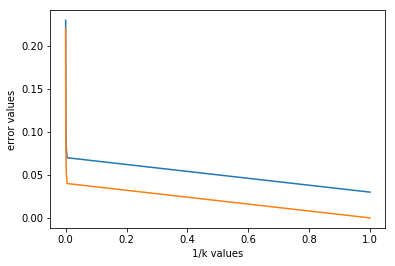

In [54]:
k_values = pd.Series([i for i in range(1, 10001, 200)])
k_values = 1/k_values
precision_values_test = pd.Series([0.97, 0.93, 0.92, 0.91, 0.90, 0.89, 0.88, 0.88, 0.87, 0.86, 0.86, 0.85, 0.85, 0.85, 0.84, 0.84, 0.83, 0.83, 0.83, 0.83, 0.82, 0.82, 0.82, 0.82, 0.81, 0.81, 0.81, 0.81, 0.80, 0.80, 0.80, 0.80, 0.80, 0.80, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.77, 0.77, 0.77, 0.77])
error_values_test = 1 - precision_values_test
plt.plot(k_values, error_values_test)
precision_values_train = pd.Series([1, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.91, 0.9, 0.89, 0.89, 0.88, 0.88, 0.88, 0.87, 0.87, 0.86, 0.86, 0.86, 0.86, 0.85, 0.85, 0.85, 0.85, 0.84, 0.84, 0.84, 0.84, 0.83, 0.83, 0.83, 0.82, 0.82, 0.82, 0.81, 0.80, 0.80, 0.80, 0.80, 0.80, 0.79, 0.79, 0.79, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78])
error_values_train = 1 - precision_values_train
plt.plot(k_values, error_values_train)

plt.xlabel("1/k values")
plt.ylabel("error values")

plt.show()


In [ ]:
for n in range(5000, 60001, 5000):
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(np.array(images[:n]), np.array(labels[:n]))
    score = model.score(np.array(imagesTest[:1000]), np.array(labelsTest[:1000]))
    print("Error for n = " + str(n) + ": " + str(1-score))

Error for n = 5000: 0.09<br>
Error for n = 10000: 0.08<br>
Error for n = 15000: 0.07<br>
Error for n = 20000: 0.06<br>
Error for n = 25000: 0.06<br>
Error for n = 30000: 0.05<br>
Error for n = 35000: 0.05<br>
Error for n = 40000: 0.04<br>
Error for n = 45000: 0.04<br>
Error for n = 50000: 0.03<br>
Error for n = 55000: 0.03<br>
Error for n = 60000: 0.03<br>

We will now plot these values into a graph.

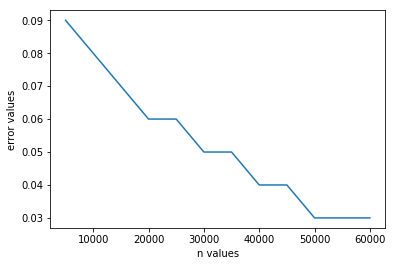

In [81]:
n_values = [i for i in range(5000, 60001, 5000)]
error_values = [0.09, 0.08, 0.07, 0.06, 0.06, 0.05, 0.05, 0.04, 0.04, 0.03, 0.03, 0.03]
plt.plot(n_values, error_values)
plt.xlabel("n values")
plt.ylabel("error values")
plt.show()

### Ques (d)
Plot the k nearest neighbors of some of misclassified samples.
I will plot 5 nearest neighbors of 10 misclassified samples in the code below.

Fitted. Now will test.
[array([False, False, False, ..., False, False, False], dtype=bool)]


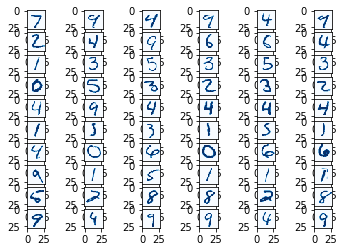

In [76]:
model.fit(np.array(images), np.array(labels))
predictions = model.predict(np.array(imagesTest))
misclassified_samples = [predictions != labelsTest]
misclassified_indices = [i for i, x in enumerate(np.array(misclassified_samples[0])) if x]
imagesMisclassified = np.array(imagesTest)[misclassified_indices]
neighDist, neighIndex = model.kneighbors(np.array(imagesMisclassified[0:10]), n_neighbors=5)

fig, ax = plt.subplots(nrows=10, ncols=6, squeeze=True)
j = 0
for row in ax:
    i = 0
    for col in row:
        if i == 0:
            image = np.array(imagesTest[j], dtype='uint8')
        else:
            image = np.array(images[neighIndex[j][i-1]], dtype='uint8')
        image = image.reshape(28, 28)
        col.imshow(image, cmap='Blues')
        i += 1
    j += 1

plt.show()

### Ques (e) i.
Minkowski Distance


A. which becomes Manhattan Distance with p = 1

In [77]:
model = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
model.fit(np.array(images), np.array(labels))
print("Fitted. Now will test.")
predictions = model.predict(np.array(imagesTest[:1000]))
print("EVALUATION ON TESTING DATA")
print(classification_report(np.array(labelsTest[:1000]), predictions))

Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.90      1.00      0.95        85
          1       0.88      1.00      0.94       126
          2       0.99      0.82      0.90       116
          3       0.90      0.91      0.90       107
          4       0.92      0.89      0.90       110
          5       0.93      0.92      0.92        87
          6       0.93      0.97      0.95        87
          7       0.83      0.91      0.87        99
          8       0.94      0.76      0.84        89
          9       0.85      0.86      0.86        94

avg / total       0.91      0.90      0.90      1000



B. with $log10(p) ∈ {0.1,.2,.3,...,1}$

In [ ]:
for i in range(1,10):
    model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p = 10**(0.1*i))
    model.fit(np.array(images), np.array(labels))
    print("Fitted. Now will test.")
    predictions = model.predict(np.array(imagesTest))
    print("EVALUATION ON TESTING DATA")
    print(classification_report(np.array(labelsTest), predictions))

Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.91      1.00      0.96        85
          1       0.89      1.00      0.94       126
          2       0.98      0.83      0.90       116
          3       0.92      0.92      0.92       107
          4       0.92      0.89      0.91       110
          5       0.93      0.92      0.92        87
          6       0.93      0.97      0.95        87
          7       0.83      0.92      0.88        99
          8       0.93      0.79      0.85        89
          9       0.85      0.86      0.86        94

avg / total       0.91      0.91      0.91      1000

Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.91      1.00      0.96        85
          1       0.90      1.00      0.95       126
          2       0.97      0.86      0.91       116
          3       0.94      0.91      0.92       107
          4       0.93      0.90      0.92       110
          5       0.92      0.92      0.92        87
          6       0.93      0.97      0.95        87
          7       0.86      0.92      0.89        99
          8       0.93      0.79      0.85        89
          9       0.85      0.87      0.86        94

avg / total       0.92      0.91      0.91      1000

Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.91      1.00      0.96        85
          1       0.91      1.00      0.95       126
          2       0.98      0.85      0.91       116
          3       0.94      0.91      0.92       107
          4       0.94      0.91      0.93       110
          5       0.92      0.93      0.93        87
          6       0.93      0.97      0.95        87
          7       0.86      0.93      0.89        99
          8       0.93      0.80      0.86        89
          9       0.86      0.89      0.88        94

avg / total       0.92      0.92      0.92      1000

Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.92      1.00      0.96        85
          1       0.93      1.00      0.96       126
          2       0.98      0.87      0.92       116
          3       0.96      0.91      0.93       107
          4       0.94      0.91      0.93       110
          5       0.93      0.94      0.94        87
          6       0.94      0.97      0.95        87
          7       0.86      0.93      0.89        99
          8       0.93      0.83      0.88        89
          9       0.86      0.89      0.88        94

avg / total       0.93      0.93      0.92      1000

Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.91      1.00      0.96        85
          1       0.93      1.00      0.96       126
          2       0.97      0.89      0.93       116
          3       0.98      0.92      0.95       107
          4       0.95      0.91      0.93       110
          5       0.94      0.94      0.94        87
          6       0.94      0.95      0.95        87
          7       0.88      0.93      0.90        99
          8       0.93      0.84      0.88        89
          9       0.86      0.90      0.88        94

avg / total       0.93      0.93      0.93      1000

Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.91      1.00      0.96        85
          1       0.95      1.00      0.97       126
          2       0.98      0.91      0.94       116
          3       0.97      0.93      0.95       107
          4       0.95      0.93      0.94       110
          5       0.95      0.94      0.95        87
          6       0.94      0.95      0.95        87
          7       0.88      0.93      0.90        99
          8       0.92      0.85      0.88        89
          9       0.89      0.90      0.89        94

avg / total       0.94      0.94      0.93      1000

Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.91      1.00      0.96        85
          1       0.94      1.00      0.97       126
          2       0.98      0.90      0.94       116
          3       0.97      0.93      0.95       107
          4       0.95      0.93      0.94       110
          5       0.95      0.94      0.95        87
          6       0.93      0.95      0.94        87
          7       0.89      0.93      0.91        99
          8       0.93      0.87      0.90        89
          9       0.89      0.91      0.90        94

avg / total       0.94      0.94      0.94      1000

Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.91      1.00      0.96        85
          1       0.95      1.00      0.97       126
          2       0.98      0.91      0.95       116
          3       0.98      0.93      0.95       107
          4       0.95      0.93      0.94       110
          5       0.94      0.94      0.94        87
          6       0.95      0.95      0.95        87
          7       0.89      0.93      0.91        99
          8       0.94      0.89      0.91        89
          9       0.89      0.91      0.90        94

avg / total       0.94      0.94      0.94      1000

Fitted. Now will test.
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.93      1.00      0.97        85
          1       0.95      1.00      0.97       126
          2       0.98      0.92      0.95       116
          3       0.98      0.94      0.96       107
          4       0.95      0.92      0.94       110
          5       0.95      0.94      0.95        87
          6       0.96      0.94      0.95        87
          7       0.91      0.93      0.92        99
          8       0.94      0.90      0.92        89
          9       0.88      0.95      0.91        94

avg / total       0.95      0.94      0.94      1000


C. which becomes Chebyshev Distance with $p → ∞$

In [ ]:
model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=float('inf'))
model.fit(np.array(images), np.array(labels))
score = model.score(np.array(imagesTest[:1000]), np.array(labelsTest[:1000]))
print("Error: " + str(1-score))

Error: 0.1983

### Ques (e) ii.
Mahalanobis Distance

In [ ]:
model = KNeighborsClassifier(algorithm='brute', n_neighbors=3, metric='mahalanobis',
                                 metric_params={'VI': np.cov(images)})

model.fit(np.array(images), np.array(labels))
score = model.score(np.array(imagesTest[:1000]), np.array(labelsTest[:1000]))
print("Error: " + str(1-score))

Error: 0.46

### Ques (e) ii.
Hausdroff Distance

In [ ]:
def hausdroff(x, y):
    return max(directed_hausdorff(x.reshape(28,28), y.reshape(28,28))[0], directed_hausdorff(y.reshape(28,28), x.reshape(28,28))[0])

model = KNeighborsClassifier(n_neighbors=k, metric=hausdroff)
model.fit(np.array(images[:10000]), np.array(labels[:10000]))
score = model.score(np.array(imagesTest[:1000]), np.array(labelsTest[:1000]))
print("Error: " + str(1-score))

Error: 0.2483

### Ques (f)
Replace the majority polling decision with another reasonable method devised by yourself. Use it with Euclidean, Manhattan, and Chebyshev distances and report the best test errors.<br>
I have taken a new metric where I square the original distance array. Let us see the results achieved for this.

In [ ]:
def my_weight(x):
    return x**2

For Euclidean distance metric, 

In [ ]:
model = KNeighborsClassifier(n_neighbors=3, weights=my_weight)
model.fit(np.array(images[:60000]), np.array(labels[:60000]))
score = model.score(np.array(imagesTest[:1000]), np.array(labelsTest[:1000]))
print("Euclidean Error: " + str(1-score))

Euclidean Error: 0.03001

For Manhattan distance metric, 

In [ ]:
model = KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights=my_weight)
model.fit(np.array(images), np.array(labels))
score = model.score(np.array(imagesTest[:1000]), np.array(labelsTest[:1000]))
print("Manhattan Error: " + str(1-score))

Manhattan Error: 0.061239872

For Chebeshev distance metric, 

In [ ]:
model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=float('inf'), weights=my_weight)
model.fit(np.array(images), np.array(labels))
score = model.score(np.array(imagesTest[:1000]), np.array(labelsTest[:1000]))
print("Chebeshev Error: " + str(1-score))

Chebeshev Error: 0.05345352

### Ques (g)
What is the lowest error rate you achieved in this exercise?<br>
The lowest error rate achieved was 0.03001 when Euclidean metric was used with k=3 and custom weight function.
A similar rate was achieved with majority polling decision as well.